# 04-3d-watershed.ipynb
This notebook is adapted from [00-basic-watershed-seg.ipynb](C:\Users\gusb\Research\PSAAP\share\ct-segment-python\00-basic-watershed-seg.ipynb), which was developed to be shared on the [Micromorph GitLab](https://micromorph.gitlab.io/).

Steps performed here include:
- Load subset of data (full set is >1.5 GB)
- Binarize images
- Stack images into 3D array
- Calculate local maxima
- Segment images
- Save segmented images

## Import packages

In [2]:
# Standard library imports
from pathlib import Path
# Third-party imports
import imagecodecs  # dependency required for loading compressed tif images
import imageio as iio
import matplotlib.pyplot as plt
import napari
import numpy as np
from scipy import ndimage as ndi
from skimage import (
    color, feature, filters, measure, segmentation, util
)

## Load data

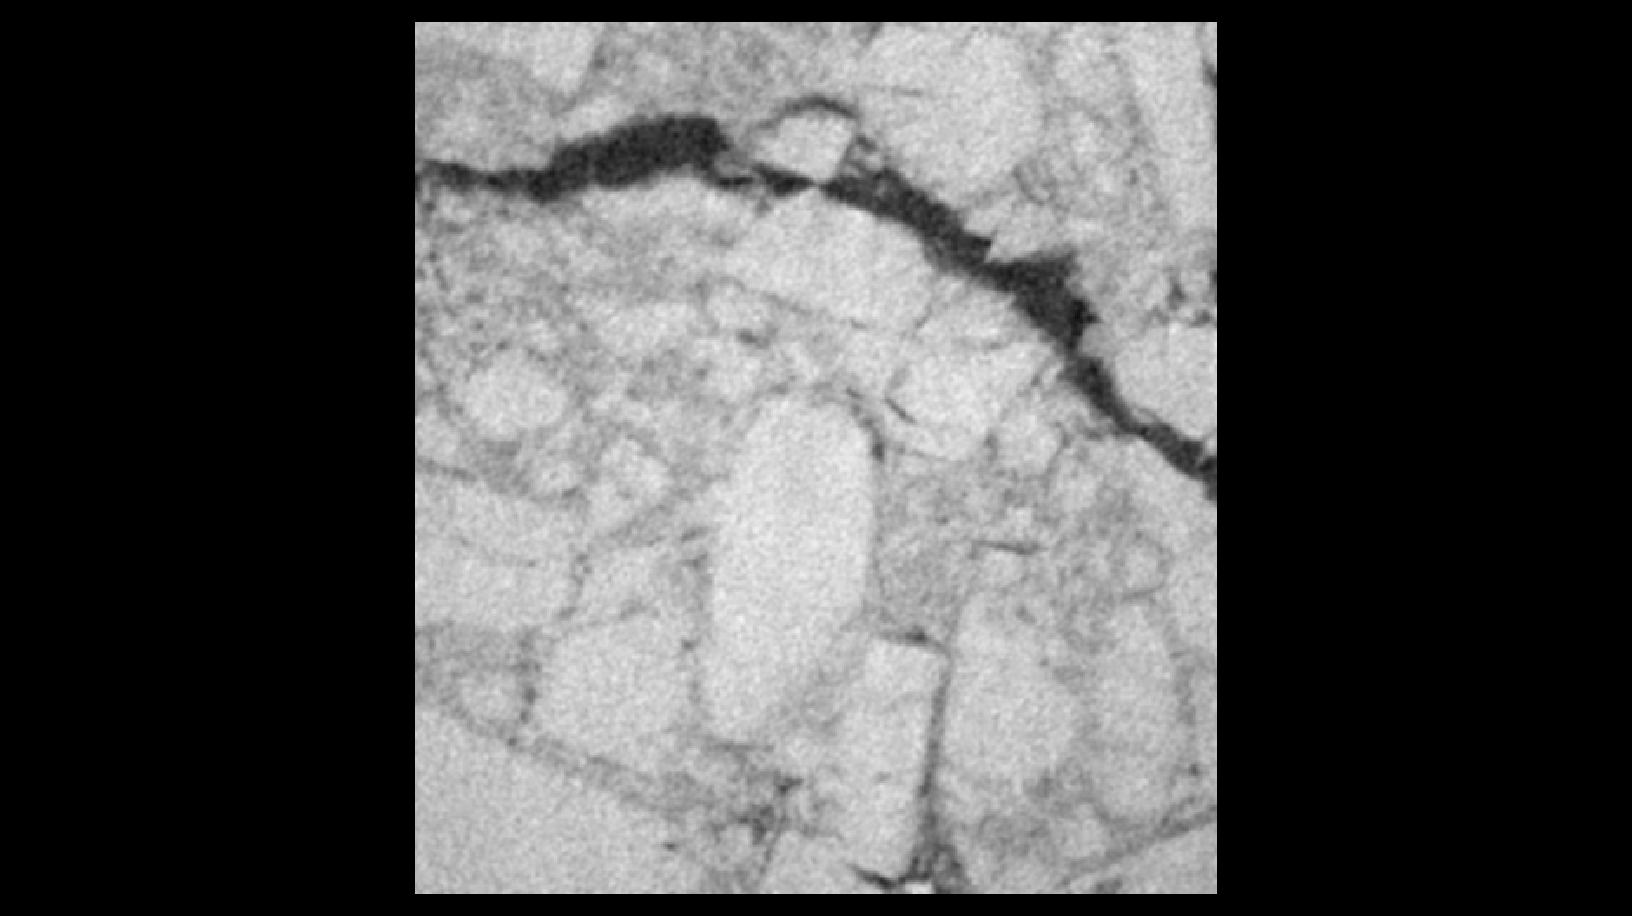

In [5]:
project_dir = Path('..')
data_dir = Path(project_dir / 'data/MOCK-IDOX_33')
img_path_list = [path for path in data_dir.glob('*.tif')]
img_path_list.sort()
data = []
for img_path in img_path_list:
    img = iio.imread(img_path)
    img = img[
        img.shape[0]//4 : 3*img.shape[0]//4,
        img.shape[1]//4 : 3*img.shape[1]//4
    ]
    img = util.img_as_float(img)
    data.append(img)
data = np.stack(data)
data = filters.gaussian(data)
# Open napari viewer
viewer = napari.Viewer()
viewer.add_image(data)
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Binarize data

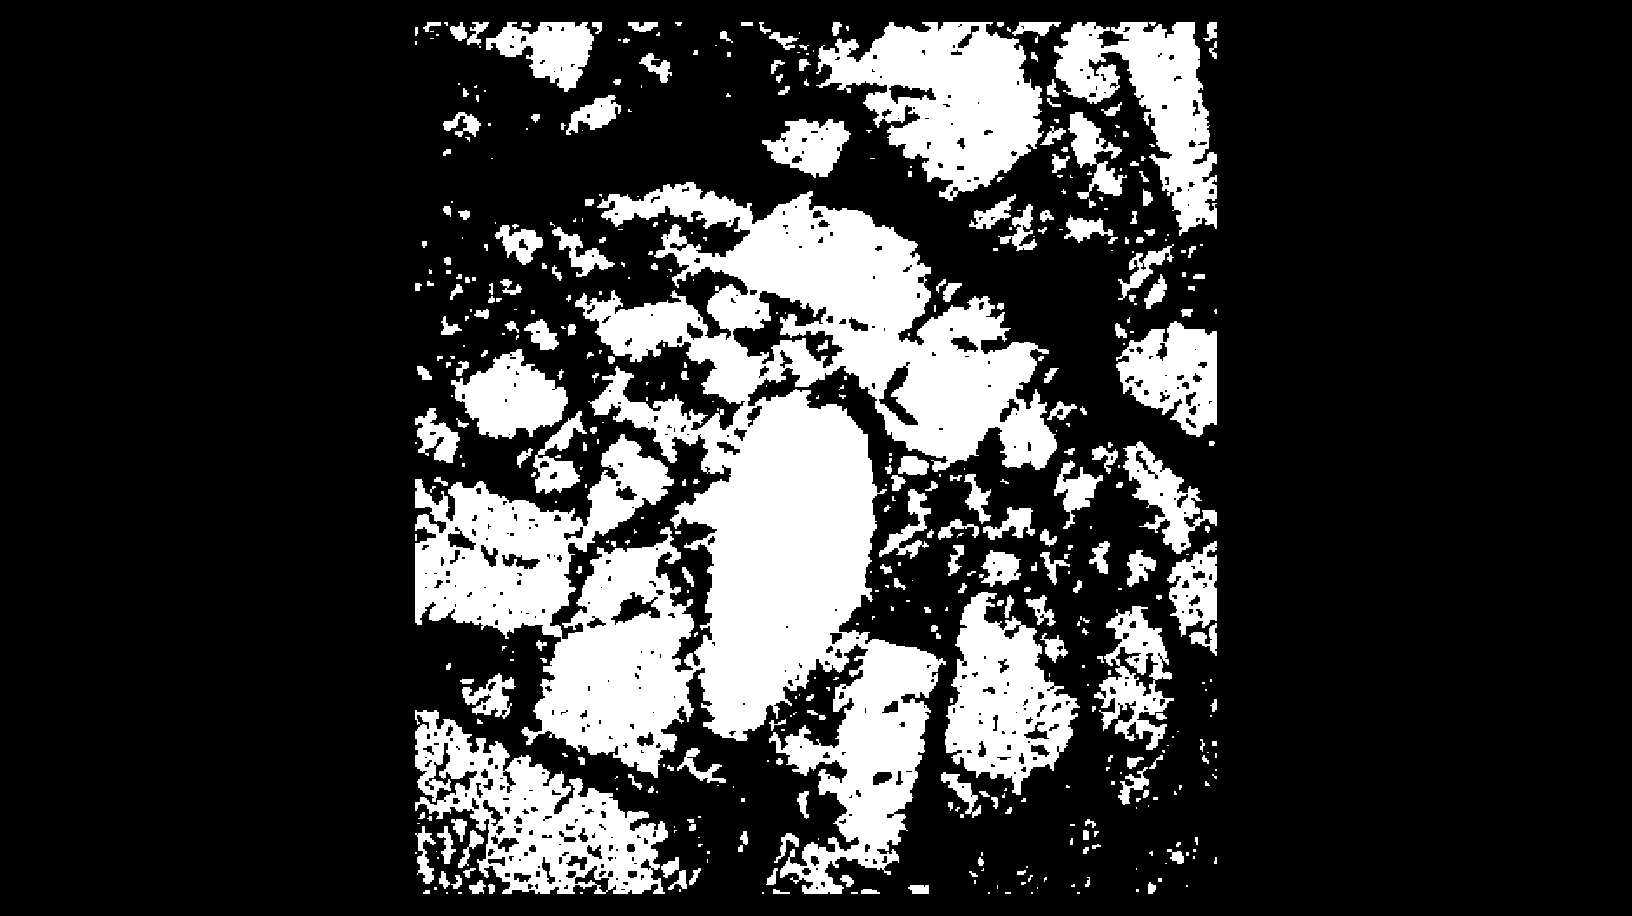

In [9]:
thresh_val = 0.65
binary = data > thresh_val
viewer.add_image(binary, name=f'thresholded: >{thresh_val}')
napari.utils.nbscreenshot(viewer, canvas_only=True)